# BFSI Case Study 17-April-2024 IIITB & upGrad - DS56

In [1]:
# importing the main libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing main datasets
main= pd.read_csv("main_loan_base.csv")
monthly= pd.read_csv("monthly_balance_base.csv")
repayment= pd.read_csv("repayment_base.csv")

In [3]:
# importing the test datasets
test_main = pd.read_csv(r"C:\Users\Admin\IITB_Upgrad\BFSI_CaseStudy\test_data\test_main_loan_base.csv")
test_monthly = pd.read_csv(r"C:\Users\Admin\IITB_Upgrad\BFSI_CaseStudy\test_data\test_monthly_balance_base.csv")
test_repayment = pd.read_csv(r"C:\Users\Admin\IITB_Upgrad\BFSI_CaseStudy\test_data\test_repayment_base.csv")

In [7]:
pwd

'C:\\Users\\Admin\\IITB_Upgrad\\BFSI_CaseStudy'

In [10]:
main.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date
0,LN79307711,Aarna Sura,"09/506, Anand Path, Ongole 646592",Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31
1,LN88987787,Amira Konda,"11, Dhaliwal Circle\nRaichur 659460",Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30
2,LN78096023,Eshani Khosla,H.No. 31\nAtwal Street\nKatihar-037896,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18
3,LN56862431,Divij Kala,"766, Gulati Marg\nPudukkottai-051396",Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13
4,LN77262680,Vaibhav Bir,"55/73, Sachdev Marg\nDharmavaram-332966",Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20


In [12]:
monthly.head()

,loan_acc_num,date,balance_amount
0,LN79307711,2010-03-26,407.343213
1,LN79307711,2010-04-25,545.431227
2,LN79307711,2010-05-25,861.932145
3,LN79307711,2010-06-24,562.082133
4,LN79307711,2010-07-24,37.768861


In [13]:
repayment.head()

,loan_acc_num,repayment_amount,repayment_date
0,LN79307711,1012.320000,2019-05-18
1,LN79307711,667.987539,2019-06-20
2,LN79307711,1012.320000,2019-07-16
3,LN79307711,1012.320000,2019-08-16
4,LN79307711,1012.320000,2019-09-22


In [14]:
test_main.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date
0,LN14086568,Jayesh Kar,"83/65, Deo Circle\nBhagalpur-852841",Car,1259062,10184.09,3,1,5,103,1,12.1,111925.04,2014-11-23,2015-04-30
1,LN37082418,Kaira Chhabra,17\nSule Ganj\nAizawl 491897,Consumer-Durable,21731,2313.21,0,3,26,39,5,12.2,485.59,2014-01-11,2017-03-11
2,LN42963368,Anahita Bhargava,51/421\nKannan Chowk\nVaranasi-209999,Car,207660,8308.71,1,2,0,63,1,13.9,18635.42,2012-10-26,2013-06-23
3,LN54572294,Myra Samra,"22\nSubramanian Marg, Bhilai 850327",Two-Wheeler,193528,26432.24,4,3,12,15,2,12.5,9155.29,2021-10-07,2023-01-19
4,LN65792799,Arhaan Rana,"22, Kapoor Road\nJalandhar 667155",Consumer-Durable,5980,1641.66,1,1,0,152,1,14.6,538.62,2020-03-04,2020-10-08


In [15]:
test_monthly.head()

,loan_acc_num,date,balance_amount
0,LN14086568,2006-12-13,9014.212689
1,LN14086568,2007-01-12,28129.516540
2,LN14086568,2007-02-11,10820.366663
3,LN14086568,2007-03-13,32491.477851
4,LN14086568,2007-04-12,24982.192310


In [16]:
test_repayment.head()

,loan_acc_num,repayment_amount,repayment_date
0,LN14086568,111925.040000,2014-12-19
1,LN14086568,111925.040000,2015-01-26
2,LN14086568,111925.040000,2015-02-21
3,LN14086568,111925.040000,2015-03-20
4,LN14086568,11590.317813,2015-04-26


In [19]:
print(main.shape)
main.info()

(50000, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_acc_num       50000 non-null  object 
 1   customer_name      50000 non-null  object 
 2   customer_address   50000 non-null  object 
 3   loan_type          50000 non-null  object 
 4   loan_amount        50000 non-null  int64  
 5   collateral_value   50000 non-null  float64
 6   cheque_bounces     50000 non-null  int64  
 7   number_of_loans    50000 non-null  int64  
 8   missed_repayments  50000 non-null  int64  
 9   vintage_in_months  50000 non-null  int64  
 10  tenure_years       50000 non-null  int64  
 11  interest           50000 non-null  float64
 12  monthly_emi        50000 non-null  float64
 13  disbursal_date     50000 non-null  object 
 14  default_date       50000 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 5.7+ MB


In [20]:
print(monthly.shape)
monthly.info()

(4002490, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4002490 entries, 0 to 4002489
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   loan_acc_num    object 
 1   date            object 
 2   balance_amount  float64
dtypes: float64(1), object(2)
memory usage: 91.6+ MB


In [21]:
print(repayment.shape)
repayment.info()

(626601, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626601 entries, 0 to 626600
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_acc_num      626601 non-null  object 
 1   repayment_amount  626601 non-null  float64
 2   repayment_date    626601 non-null  object 
dtypes: float64(1), object(2)
memory usage: 14.3+ MB


In [4]:
#checking for duplicate data

main_temp = main[~main['loan_acc_num'].duplicated()]
print(main_temp.shape)

(49985, 15)


In [ ]:
#After checking for duplicates the number is small so deleting those from the main dataset 

In [5]:
#checking for duplicate data

main = main[~main['loan_acc_num'].duplicated()]
print(main.shape)

(49985, 15)


In [6]:
#checking the duplicate data in test dataset
test_main = test_main[~test_main['loan_acc_num'].duplicated()]
print(test_main.shape)

(9997, 15)


In [6]:
print(repayment['loan_acc_num'].nunique())
print(repayment['repayment_amount'].nunique())
print(repayment['repayment_date'].nunique())

46008
138950
4813


In [7]:
print(repayment.head())
print(repayment.tail())


  loan_acc_num  repayment_amount repayment_date
0   LN79307711       1012.320000     2019-05-18
1   LN79307711        667.987539     2019-06-20
2   LN79307711       1012.320000     2019-07-16
3   LN79307711       1012.320000     2019-08-16
4   LN79307711       1012.320000     2019-09-22
       loan_acc_num  repayment_amount repayment_date
626596   LN74765572           3771.91     2014-10-22
626597   LN74765572           3771.91     2014-11-15
626598   LN46546410          21443.47     2014-06-12
626599   LN46546410          21443.47     2014-07-18
626600   LN46546410          21443.47     2014-08-18


In [7]:
#Get the total repayment amount for each loan amount and for uniformity we will round all the amount columns to 2 decimals

repayment = round(repayment.groupby('loan_acc_num')['repayment_amount'].sum(),2)
repayment = pd.DataFrame({"loan_acc_num":repayment.index, "repayment_amount":repayment.values})
print(repayment.head())
print(repayment.shape)

  loan_acc_num  repayment_amount
0   LN10000701          40020.99
1   LN10001077         112218.47
2   LN10004116         290634.94
3   LN10007976         337321.72
4   LN10010204          61290.49
(46008, 2)


In [8]:
#applying the same on Test Dataset

test_repayment = round(test_repayment.groupby('loan_acc_num')['repayment_amount'].sum(),2)
test_repayment = pd.DataFrame({"loan_acc_num":test_repayment.index, "repayment_amount":test_repayment.values})
test_repayment.head()

,loan_acc_num,repayment_amount
0,LN10011015,1725.31
1,LN10028091,3560.31
2,LN10033713,11582.17
3,LN10045654,66181.74
4,LN10051605,87664.41


In [9]:
#Lets merge these 2 datasets on loan_acc_num

df = pd.merge(
    left=main,
    right=repayment,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [10]:
#lets apply on the test dataset to replicate the same

test_df = pd.merge(
    left=test_main,
    right=test_repayment,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [12]:
print(df.head())
print(test_df.head())

  loan_acc_num  customer_name                         customer_address  \
0   LN79307711     Aarna Sura        09/506, Anand Path, Ongole 646592   
1   LN88987787    Amira Konda      11, Dhaliwal Circle\nRaichur 659460   
2   LN78096023  Eshani Khosla   H.No. 31\nAtwal Street\nKatihar-037896   
3   LN56862431     Divij Kala     766, Gulati Marg\nPudukkottai-051396   
4   LN77262680    Vaibhav Bir  55/73, Sachdev Marg\nDharmavaram-332966   

          loan_type  loan_amount  collateral_value  cheque_bounces  \
0  Consumer-Durable        21916           4929.47               3   
1       Two-Wheeler       121184          10254.50               1   
2               Car       487036         116183.86               0   
3       Two-Wheeler        52125          10310.05               5   
4  Consumer-Durable         8635           1051.25               0   

   number_of_loans  missed_repayments  vintage_in_months  tenure_years  \
0                0                  3                127    

In [11]:
#calculating the LGD Loss Given Default (LGD = (Loan Amount - (Collateral Value + sum of Repayments)/Loan Amount)

df['lgd_target'] = (df['loan_amount']-(df['collateral_value']+df['repayment_amount']))/df['loan_amount']

In [14]:
df.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,lgd_target
0,LN79307711,Aarna Sura,"09/506, Anand Path, Ongole 646592",Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31,13572.58,0.155774
1,LN88987787,Amira Konda,"11, Dhaliwal Circle\nRaichur 659460",Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30,96243.61,0.121187
2,LN78096023,Eshani Khosla,H.No. 31\nAtwal Street\nKatihar-037896,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18,74083.73,0.609336
3,LN56862431,Divij Kala,"766, Gulati Marg\nPudukkottai-051396",Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13,NaN,NaN
4,LN77262680,Vaibhav Bir,"55/73, Sachdev Marg\nDharmavaram-332966",Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20,4462.51,0.361464


In [15]:
df.isnull().sum()

loan_acc_num            0
customer_name           0
customer_address        0
loan_type               0
loan_amount             0
collateral_value        0
cheque_bounces          0
number_of_loans         0
missed_repayments       0
vintage_in_months       0
tenure_years            0
interest                0
monthly_emi             0
disbursal_date          0
default_date            0
repayment_amount     3977
lgd_target           3977
dtype: int64

In [16]:
test_df.isnull().sum()

loan_acc_num           0
customer_name          0
customer_address       0
loan_type              0
loan_amount            0
collateral_value       0
cheque_bounces         0
number_of_loans        0
missed_repayments      0
vintage_in_months      0
tenure_years           0
interest               0
monthly_emi            0
disbursal_date         0
default_date           0
repayment_amount     768
dtype: int64

In [12]:
#using fillna for imputation where null
df['repayment_amount'] = df['repayment_amount'].fillna(0)

In [13]:
#using fillna for imputation where null
test_df['repayment_amount'] = test_df['repayment_amount'].fillna(0)

In [14]:
#null value imputation
df['lgd_target'] = df['lgd_target'].fillna(df['lgd_target'].mean())

In [15]:
#lets calculate the amount due (calculated as Loan Amount - Repayment Amount) 

df['due_amount'] = df['loan_amount'] - df['repayment_amount']
test_df['due_amount'] = test_df['loan_amount'] - test_df['repayment_amount']

In [21]:
df.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,lgd_target,due_amount
0,LN79307711,Aarna Sura,"09/506, Anand Path, Ongole 646592",Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31,13572.58,0.155774,8343.42
1,LN88987787,Amira Konda,"11, Dhaliwal Circle\nRaichur 659460",Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30,96243.61,0.121187,24940.39
2,LN78096023,Eshani Khosla,H.No. 31\nAtwal Street\nKatihar-037896,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18,74083.73,0.609336,412952.27
3,LN56862431,Divij Kala,"766, Gulati Marg\nPudukkottai-051396",Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13,0.00,0.423265,52125.00
4,LN77262680,Vaibhav Bir,"55/73, Sachdev Marg\nDharmavaram-332966",Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20,4462.51,0.361464,4172.49


In [22]:
print(monthly['loan_acc_num'].nunique())
print(monthly['date'].nunique())
print(monthly['balance_amount'].nunique())

49671
10695
4002490


In [24]:
print(monthly.head())
print(monthly.tail())

  loan_acc_num        date  balance_amount
0   LN79307711  2010-03-26      407.343213
1   LN79307711  2010-04-25      545.431227
2   LN79307711  2010-05-25      861.932145
3   LN79307711  2010-06-24      562.082133
4   LN79307711  2010-07-24       37.768861
        loan_acc_num        date  balance_amount
4002485   LN46546410  2014-08-12    10875.235336
4002486   LN46546410  2014-09-11     8479.809099
4002487   LN46546410  2014-10-11     9745.974332
4002488   LN46546410  2014-11-10     9226.494566
4002489   LN46546410  2014-12-10     8851.138461


In [16]:
#Get the total balance amount for each loan amount and for uniformity we will round all the amount columns to 2 decimals

monthly = round(monthly.groupby('loan_acc_num')['balance_amount'].mean(),2)
monthly = pd.DataFrame({"loan_acc_num":monthly.index, "average_monthly_balance":monthly.values})
monthly.head()

,loan_acc_num,average_monthly_balance
0,LN10000701,2301.88
1,LN10001077,2296.28
2,LN10004116,8887.38
3,LN10007976,9420.56
4,LN10010204,6446.21


In [17]:
#applying the same on Test datasets

test_monthly = round(test_monthly.groupby('loan_acc_num')['balance_amount'].mean(),2)
test_monthly = pd.DataFrame({"loan_acc_num":test_monthly.index, "average_monthly_balance":test_monthly.values})
test_monthly.head()

,loan_acc_num,average_monthly_balance
0,LN10011015,25.09
1,LN10028091,62.53
2,LN10033713,182.41
3,LN10045654,1838.35
4,LN10051605,3374.17


#Lets merge this dataset with df so we get all the data in one frame - 
Main dataset + Loan Repayment + Monthly Balances

In [18]:
final_data = pd.merge(
    left=df,
    right=monthly,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [19]:
final_test_data = pd.merge(
    left=test_df,
    right=test_monthly,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [29]:
final_data.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,lgd_target,due_amount,average_monthly_balance
0,LN79307711,Aarna Sura,"09/506, Anand Path, Ongole 646592",Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31,13572.58,0.155774,8343.42,585.51
1,LN88987787,Amira Konda,"11, Dhaliwal Circle\nRaichur 659460",Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30,96243.61,0.121187,24940.39,7382.03
2,LN78096023,Eshani Khosla,H.No. 31\nAtwal Street\nKatihar-037896,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18,74083.73,0.609336,412952.27,7812.88
3,LN56862431,Divij Kala,"766, Gulati Marg\nPudukkottai-051396",Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13,0.00,0.423265,52125.00,518.08
4,LN77262680,Vaibhav Bir,"55/73, Sachdev Marg\nDharmavaram-332966",Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20,4462.51,0.361464,4172.49,323.68


In [20]:
#using fillna for imputation where null
final_data['average_monthly_balance'] = final_data['average_monthly_balance'].fillna(final_data['average_monthly_balance'].mean())

In [21]:
#using fillna for imputation where null
final_test_data['average_monthly_balance'] = final_test_data['average_monthly_balance'].fillna(final_test_data['average_monthly_balance'].mean())

In [32]:
final_data.describe()

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,repayment_amount,lgd_target,due_amount,average_monthly_balance
count,4.998500e+04,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,4.998500e+04,49985.000000,4.998500e+04,49985.000000
mean,3.817142e+05,57195.113444,1.764769,1.509573,9.807482,80.016705,2.994578,11.484611,16593.115676,1.514337e+05,0.423265,2.302806e+05,7679.277191
std,5.037769e+05,93412.679667,1.760305,1.259326,7.787036,44.141987,1.415455,2.019790,26696.292090,2.554824e+05,0.225701,3.437854e+05,16071.151167
min,2.000000e+03,0.070000,0.000000,0.000000,0.000000,15.000000,1.000000,8.000000,42.520000,0.000000e+00,-5.708000,-8.573322e+04,0.100000
25%,2.393400e+04,3329.430000,0.000000,0.000000,4.000000,44.000000,2.000000,9.700000,1158.280000,6.761950e+03,0.242430,1.580488e+04,417.980000
50%,1.926920e+05,19866.280000,1.000000,1.000000,8.000000,78.000000,3.000000,11.500000,6541.020000,4.849626e+04,0.423265,9.599627e+04,2186.470000
75%,4.334780e+05,62323.370000,3.000000,2.000000,15.000000,113.000000,4.000000,13.200000,19438.430000,1.668996e+05,0.600358,2.602902e+05,7557.930000
max,1.999992e+06,592545.710000,11.000000,6.000000,38.000000,258.000000,5.000000,15.000000,179521.680000,1.852111e+06,0.898372,1.997948e+06,261799.900000


In [22]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49985 entries, 0 to 49984
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_acc_num             49985 non-null  object 
 1   customer_name            49985 non-null  object 
 2   customer_address         49985 non-null  object 
 3   loan_type                49985 non-null  object 
 4   loan_amount              49985 non-null  int64  
 5   collateral_value         49985 non-null  float64
 6   cheque_bounces           49985 non-null  int64  
 7   number_of_loans          49985 non-null  int64  
 8   missed_repayments        49985 non-null  int64  
 9   vintage_in_months        49985 non-null  int64  
 10  tenure_years             49985 non-null  int64  
 11  interest                 49985 non-null  float64
 12  monthly_emi              49985 non-null  float64
 13  disbursal_date           49985 non-null  object 
 14  default_date          

In [23]:
#Converting the Date from Object type to date format

final_data['disbursal_date'] = pd.to_datetime(final_data['disbursal_date'], infer_datetime_format=True)
final_data['default_date'] = pd.to_datetime(final_data['default_date'], infer_datetime_format=True)

In [30]:
#converting the test data too

final_test_data['disbursal_date'] = pd.to_datetime(final_test_data['disbursal_date'], infer_datetime_format=True)
final_test_data['default_date'] = pd.to_datetime(final_test_data['default_date'], infer_datetime_format=True)

In [24]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49985 entries, 0 to 49984
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_acc_num             49985 non-null  object        
 1   customer_name            49985 non-null  object        
 2   customer_address         49985 non-null  object        
 3   loan_type                49985 non-null  object        
 4   loan_amount              49985 non-null  int64         
 5   collateral_value         49985 non-null  float64       
 6   cheque_bounces           49985 non-null  int64         
 7   number_of_loans          49985 non-null  int64         
 8   missed_repayments        49985 non-null  int64         
 9   vintage_in_months        49985 non-null  int64         
 10  tenure_years             49985 non-null  int64         
 11  interest                 49985 non-null  float64       
 12  monthly_emi              49985 n

In [25]:
#Lets create 2 variables to contain the categorical and numeric columns. Lets seperate basis of the data types
final_data_num = final_data.select_dtypes(include=[np.number])
print(final_data_num)

       loan_amount  collateral_value  cheque_bounces  number_of_loans  \
0            21916           4929.47               3                0   
1           121184          10254.50               1                0   
2           487036         116183.86               0                1   
3            52125          10310.05               5                2   
4             8635           1051.25               0                1   
...            ...               ...             ...              ...   
49980       222483          43088.19               2                2   
49981       104051           8666.54               6                2   
49982        51767           4101.24               1                0   
49983        77869          10652.77               0                0   
49984       241857          59258.17               0                2   

       missed_repayments  vintage_in_months  tenure_years  interest  \
0                      3                127         

In [27]:
final_data_cat = final_data.select_dtypes(exclude=[np.number])
print(final_data_cat.columns)

Index(['loan_acc_num', 'customer_name', 'customer_address', 'loan_type',
       'disbursal_date', 'default_date'],
      dtype='object')


In [26]:
print(final_data_num.columns)

Index(['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'lgd_target', 'due_amount',
       'average_monthly_balance'],
      dtype='object')


#Starting with univariate analysis

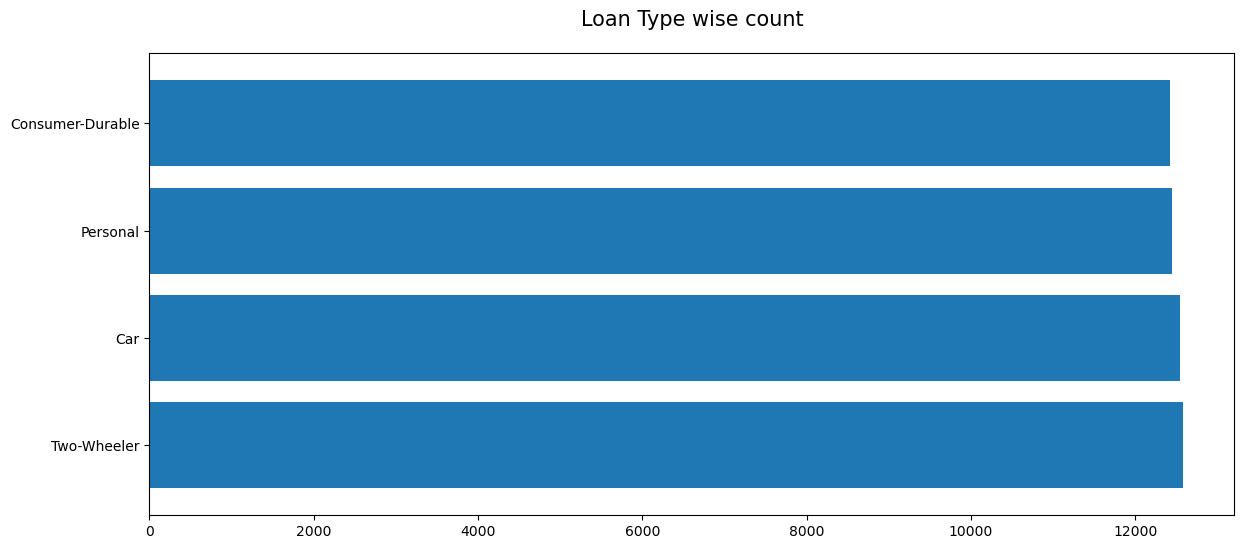

In [29]:
#Univariate Analysis
plt.figure(figsize = [14,6])
final_data["loan_type"].value_counts().plot.barh(width = .8)
plt.title("Loan Type wise count", fontdict={"fontsize":15}, pad =20)
plt.show()

#Plotting all the muneric variables - so creating a function which can be called

In [31]:
def univariate_for_numeric(df, col):
    sns.set(style='whitegrid')
    plt.figure(figsize=(25, 5))
    
    plt.subplot(1, 3, 1)
    sns.boxplot(data=df, x=col, orient='v').set(title='Box Plot')
    
    plt.subplot(1, 3, 2)
    sns.distplot(df[col].dropna()).set(title='Distplot')
    plt.show()

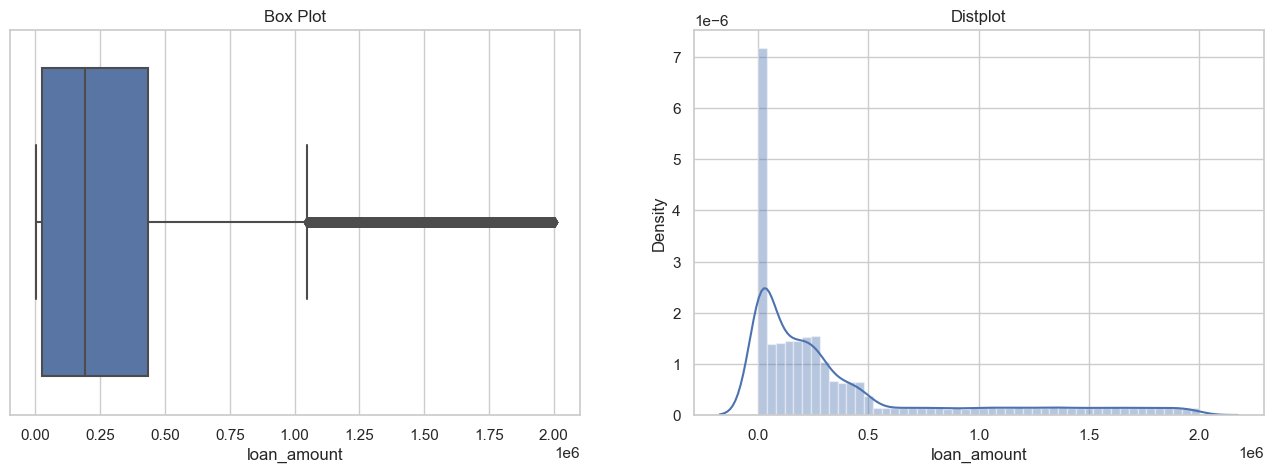

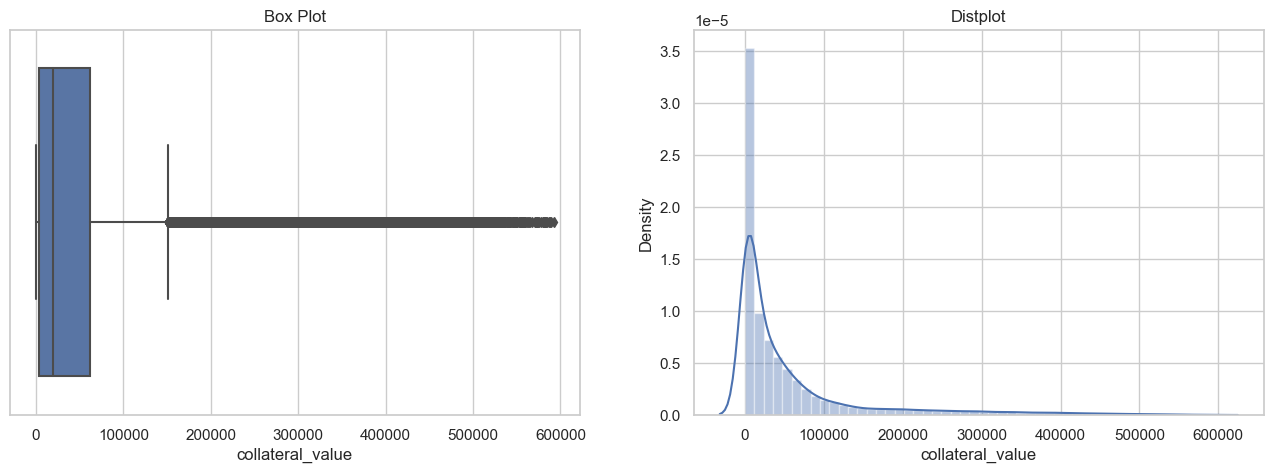

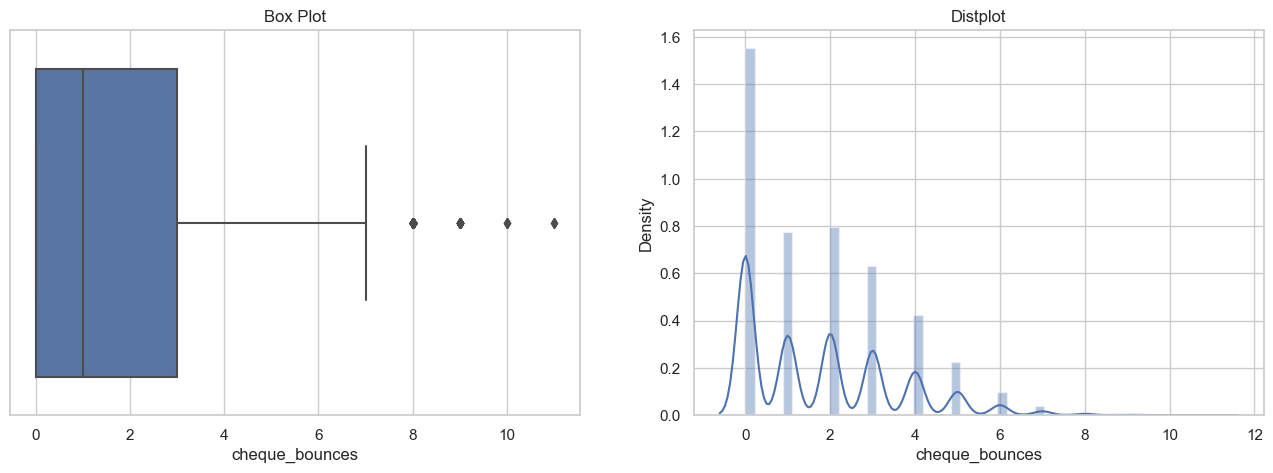

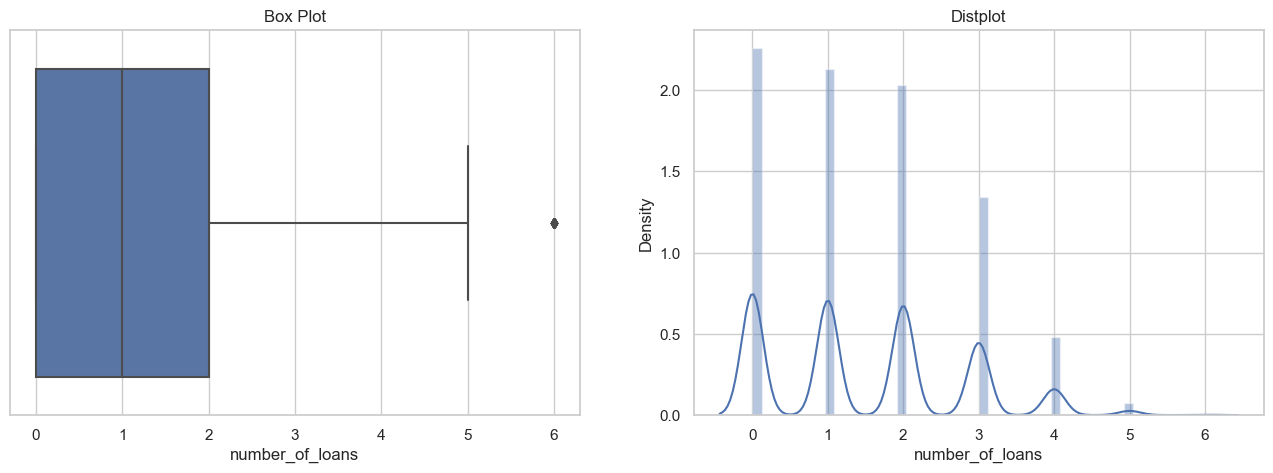

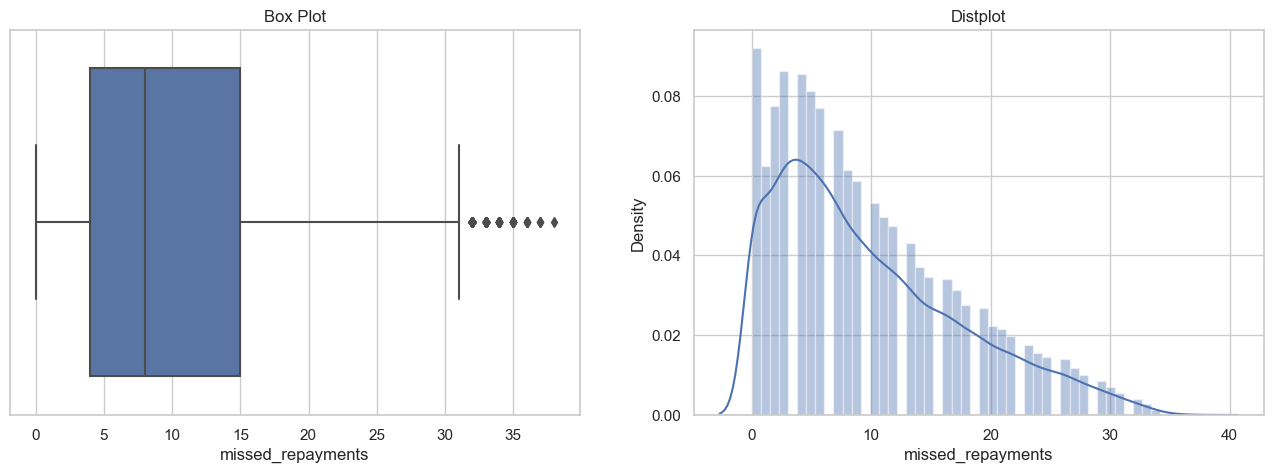

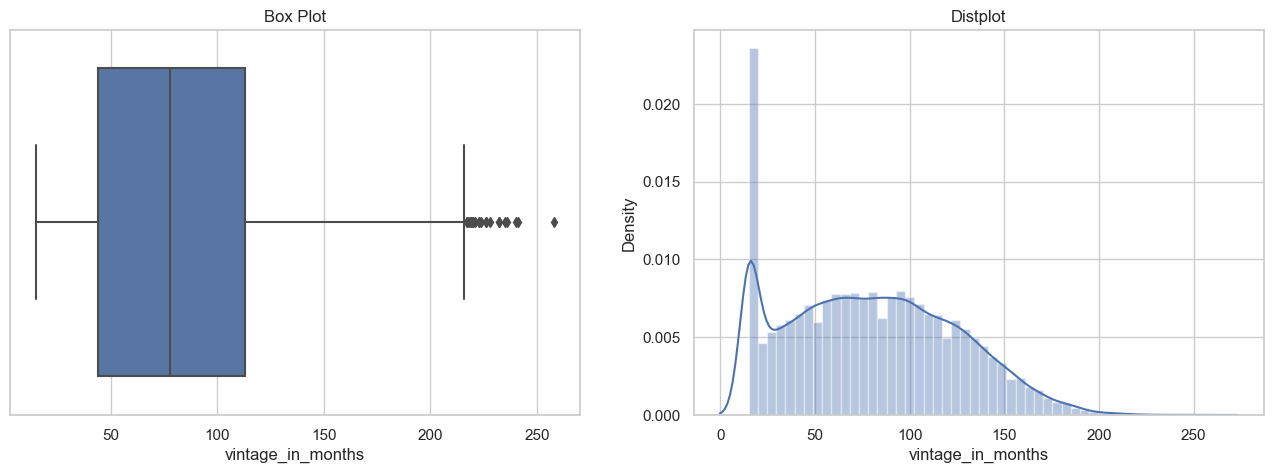

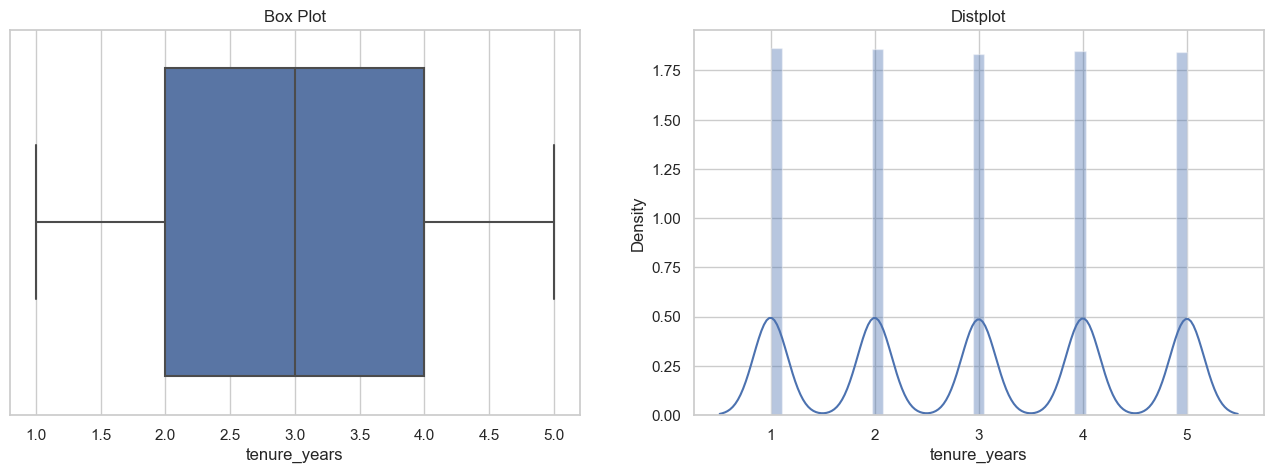

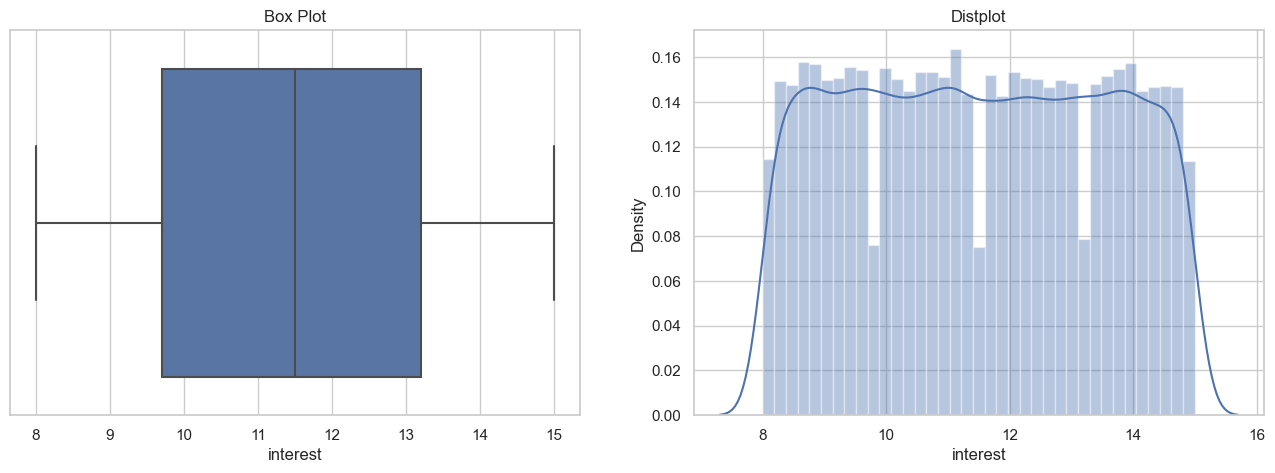

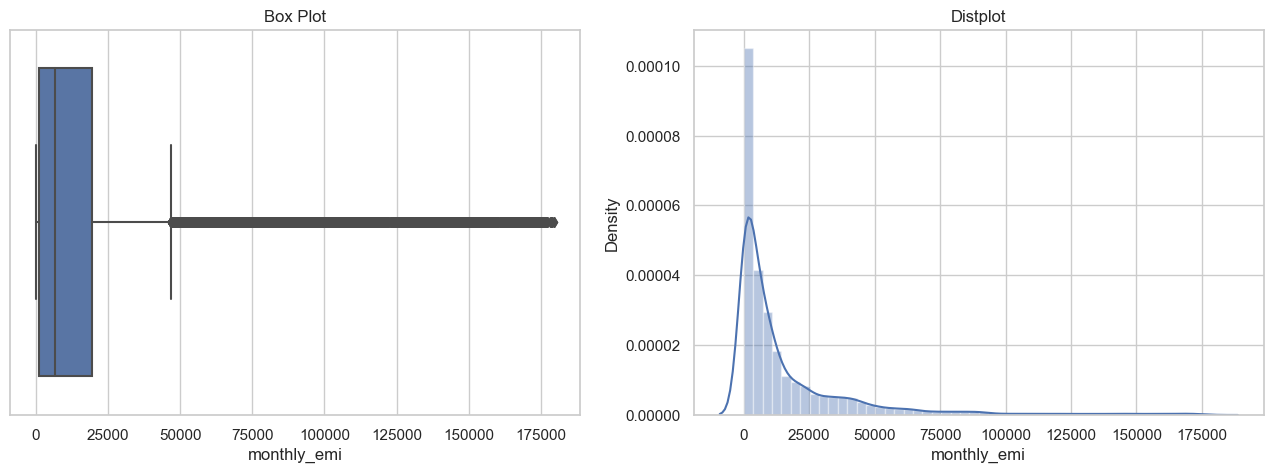

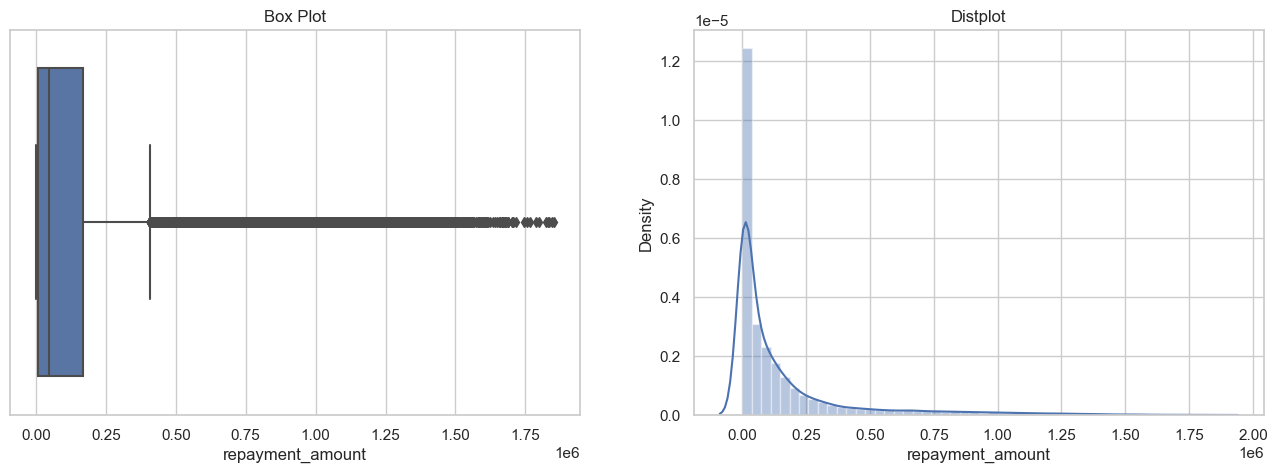

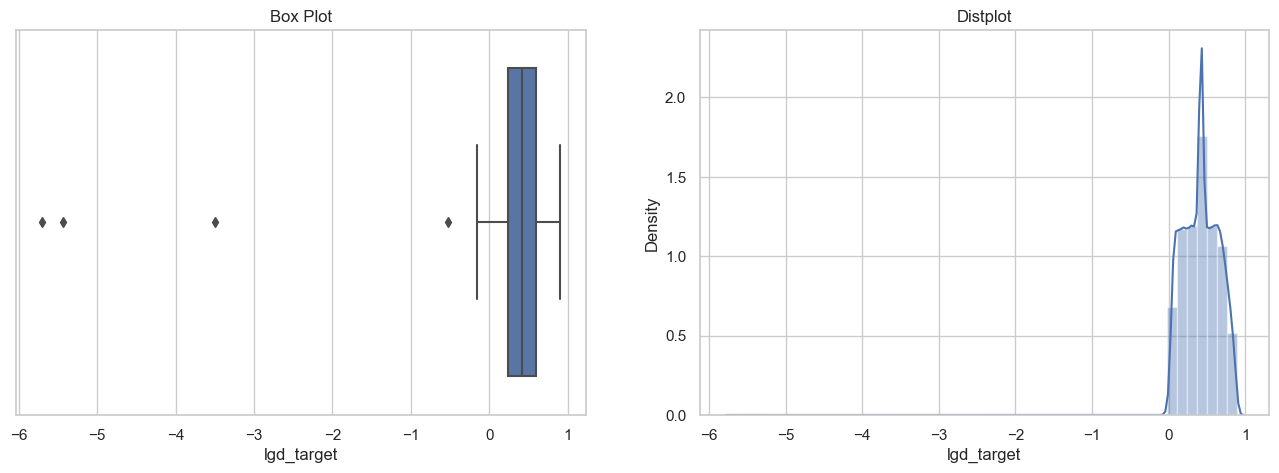

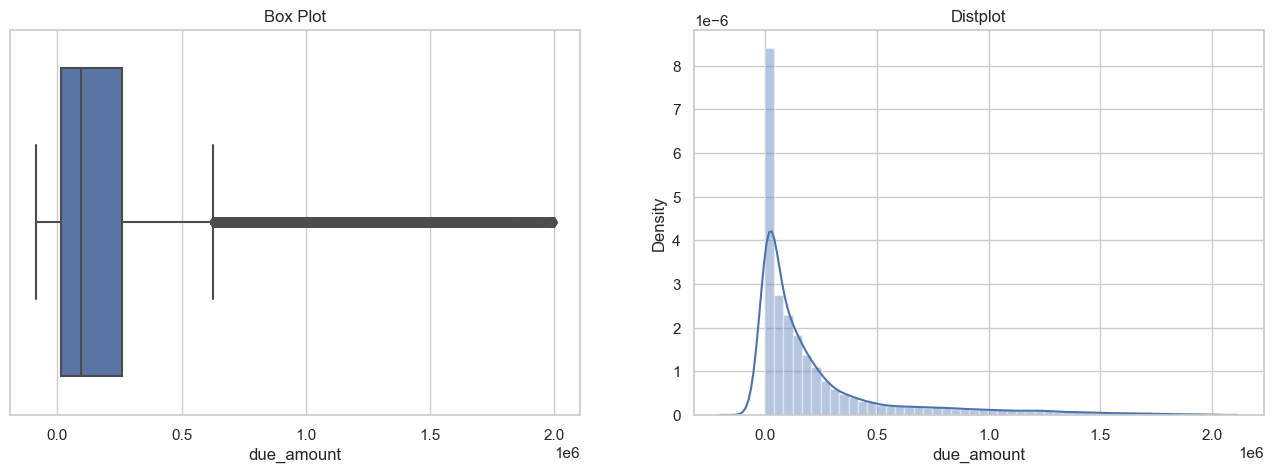

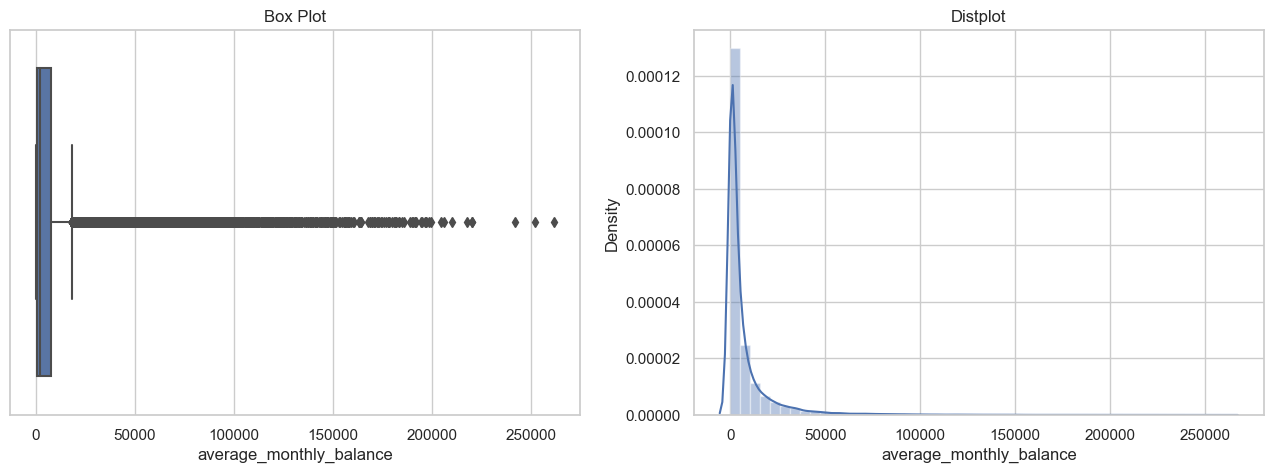

In [35]:
#Numerical columns
for i in final_data_num:
    univariate_for_numeric(final_data,i)

In [33]:
import warnings

warnings.filterwarnings('ignore')

Observation - 
1. Two wheeler loan number is maximum
2. Car loans are maximum